# Feature Engineering

## Let's import our libraries

In [1]:
from pydataset import data
import numpy as np
import pandas as pd
import seaborn as sns
import split_scale as ss
import explore as ex
import evaluate as ev
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression

## Now for our data:

In [2]:
tips = data('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


## Let's make sure everything is in a good datatype

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


## Looks good, so let's add a new column for tip percentage

In [4]:
tips['tip_percentage'] = tips.tip / tips.total_bill
tips

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
243,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## Let's also add a column for price_per_person

In [5]:
tips['price_per_person'] = tips.total_bill / tips['size']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,6.147500
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,9.676667
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,13.590000
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,11.335000
243,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,8.910000


## Let's split up our data so that we can get to evaluating

In [6]:
train, test = ss.single_split_my_data(tips, .8, 13)
train

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,price_per_person
217,28.15,3.00,Male,Yes,Sat,Dinner,5,0.106572,5.630000
34,20.69,2.45,Female,No,Sat,Dinner,4,0.118415,5.172500
212,25.89,5.16,Male,Yes,Sat,Dinner,4,0.199305,6.472500
158,25.00,3.75,Female,No,Sun,Dinner,4,0.150000,6.250000
71,12.02,1.97,Male,No,Sat,Dinner,2,0.163894,6.010000
...,...,...,...,...,...,...,...,...,...
231,24.01,2.00,Male,Yes,Sat,Dinner,4,0.083299,6.002500
17,10.33,1.67,Female,No,Sun,Dinner,3,0.161665,3.443333
75,14.73,2.20,Female,No,Sat,Dinner,2,0.149355,7.365000
177,17.89,2.00,Male,Yes,Sun,Dinner,2,0.111794,8.945000


## Next  we are going to use some feature selection methods from sklearn to select the best features but lets see if we can guess what the best features are going to be for predicting tip amount and tip percentage

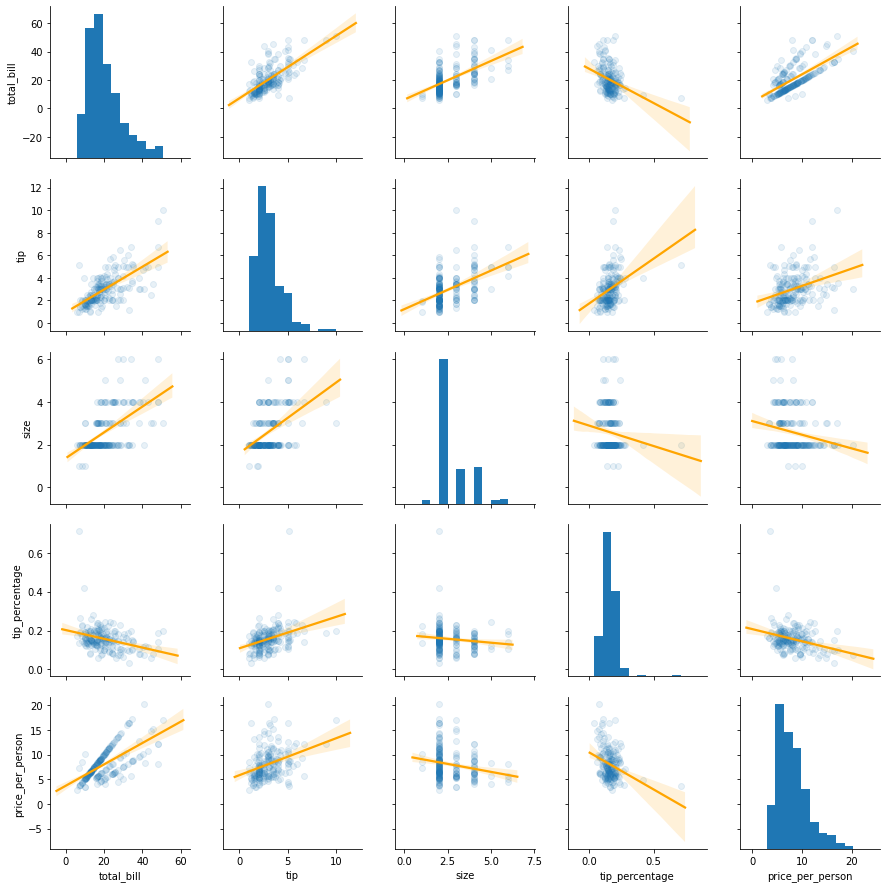

In [7]:
ex.plot_variable_pairs(train)

So looking at the pairplot above here is what I see
* **tip amount**
    * total bill has a pretty good line and a tight confidence interval so it could be a good feature
    * size also has a good line and a tight confidence interval
    * price per person seems to have a wider confidence interval and it look less linear so this probably isn't a great feature
* **tip percentage**
    * total bill shows a negative relationship and a has a tight confidence interval it could be a good feature
    * size also has a negative relationship and there is a tight confidence interval
    * price per person seems to have a wider confidence interval

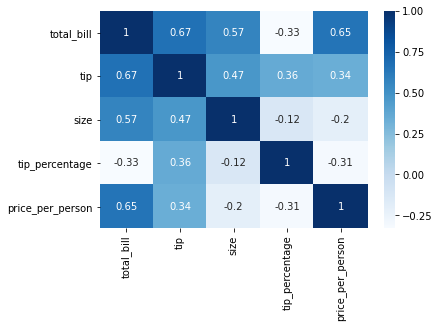

In [8]:
sns.heatmap(train.corr(), annot=True, cmap='Blues')

## Now lets use some feature engineering methods

We will start with the tip amount as the target variable and use two different methods to find the two best features

### Tip Amount

#### Select K Best

In [9]:
train, test = ss.single_split_my_data(tips, .8, 13)

train = train.drop(columns=['sex', 'smoker', 'day', 'time'])
test = test.drop(columns=['sex', 'smoker', 'day', 'time'])

scaler, train, test = ss.standard_scaler(train, test)

X_train = train[['total_bill', 'size', 'price_per_person']]
y_train = train[['tip']]
X_test = test[['total_bill', 'size', 'price_per_person']]
y_test = test[['tip']]

f_selector = SelectKBest(f_regression, k=2)
f_selector.fit(X_train, y_train)

f_support = f_selector.get_support()
f_feature = X_train.loc[:,f_support].columns.tolist()
f_feature

['total_bill', 'size']

#### Recursive Feature Elimination

In [10]:
lm = LinearRegression()
rfe = RFE(lm, 2)
rfe.fit(X_train, y_train)

rfe_features = X_train.loc[:,rfe.support_].columns.tolist()
rfe_features

['total_bill', 'price_per_person']

So we can see that:

* **Select K Best** says the best features are:
    * total bill
    * size
* **RFE** says the best features are:
    * total bill
    * price per person
    
### Now for tip percentage

#### Select K Best

In [11]:
train, test = ss.single_split_my_data(tips, .8, 13)

train = train.drop(columns=['sex', 'smoker', 'day', 'time'])
test = test.drop(columns=['sex', 'smoker', 'day', 'time'])

scaler, train, test = ss.standard_scaler(train, test)

X_train = train[['total_bill', 'size', 'price_per_person']]
y_train = train[['tip_percentage']]
X_test = test[['total_bill', 'size', 'price_per_person']]
y_test = test[['tip_percentage']]

f_selector = SelectKBest(f_regression, k=2)
f_selector.fit(X_train, y_train)

f_support = f_selector.get_support()
f_feature = X_train.loc[:,f_support].columns.tolist()
f_feature

['total_bill', 'price_per_person']

#### Recursive Feature Elimination

In [12]:
rfe = RFE(lm, 2)
rfe.fit(X_train, y_train)

rfe_features = X_train.loc[:,rfe.support_].columns.tolist()
rfe_features

['size', 'price_per_person']

So we can see that:

* **Select K Best** says the best features are:
    * total bill
    * price per person
* **RFE** says the best features are:
    * size
    * price per person
    
So we can see that Select K Best and RFE come up with some different answers. Let's see if the still happens when we look for the best feature

### Tip Amount

#### Select K Best

In [13]:
train, test = ss.single_split_my_data(tips, .8, 13)

train = train.drop(columns=['sex', 'smoker', 'day', 'time'])
test = test.drop(columns=['sex', 'smoker', 'day', 'time'])

scaler, train, test = ss.standard_scaler(train, test)

X_train = train[['total_bill', 'size', 'price_per_person']]
y_train = train[['tip']]
X_test = test[['total_bill', 'size', 'price_per_person']]
y_test = test[['tip']]

f_selector = SelectKBest(f_regression, k=1)
f_selector.fit(X_train, y_train)

f_support = f_selector.get_support()
f_feature = X_train.loc[:,f_support].columns.tolist()
f_feature

['total_bill']

#### Recursive Feature Elimination

In [14]:
lm = LinearRegression()
rfe = RFE(lm, 1)
rfe.fit(X_train, y_train)

rfe_features = X_train.loc[:,rfe.support_].columns.tolist()
rfe_features

['total_bill']

### Tip Percentage

#### Select K Best

In [15]:
train, test = ss.single_split_my_data(tips, .8, 13)

train = train.drop(columns=['sex', 'smoker', 'day', 'time'])
test = test.drop(columns=['sex', 'smoker', 'day', 'time'])

scaler, train, test = ss.standard_scaler(train, test)

X_train = train[['total_bill', 'size', 'price_per_person']]
y_train = train[['tip_percentage']]
X_test = test[['total_bill', 'size', 'price_per_person']]
y_test = test[['tip_percentage']]

f_selector = SelectKBest(f_regression, k=1)
f_selector.fit(X_train, y_train)

f_support = f_selector.get_support()
f_feature = X_train.loc[:,f_support].columns.tolist()
f_feature

['total_bill']

#### Recursive Feature Elimination

In [16]:
lm = LinearRegression()
rfe = RFE(lm, 1)
rfe.fit(X_train, y_train)

rfe_features = X_train.loc[:,rfe.support_].columns.tolist()
rfe_features

['price_per_person']

So we can see that when we look for the best feature, everything but the RFE for tip percentage said that total bill is the best feature

## Now lets make some functions to do some of this work for us

### First we will start with a function that gives us the best features from Select K Best

In [17]:
def select_kbest(X, y, k):
    '''
    X: pd.DataFrame; Scaled features
    y: pd.DataFrame; Scaled target
    k: int; number of features to return
    
    Returns a list of the column names that are the k best features
    '''
    f_selector = SelectKBest(f_regression, k=k)
    f_selector.fit(X, y)

    f_support = f_selector.get_support()
    f_feature = X.loc[:,f_support].columns.tolist()
    return f_feature

In [18]:
train, test = ss.single_split_my_data(tips, .8, 13)

train = train.drop(columns=['sex', 'smoker', 'day', 'time'])
test = test.drop(columns=['sex', 'smoker', 'day', 'time'])

scaler, train, test = ss.standard_scaler(train, test)

X_train = train[['total_bill', 'size', 'price_per_person']]
y_train = train[['tip']]
X_test = test[['total_bill', 'size', 'price_per_person']]
y_test = test[['tip']]

select_kbest(X_train, y_train, 2)

['total_bill', 'size']

In [19]:
train, test = ss.single_split_my_data(tips, .8, 13)

train = train.drop(columns=['sex', 'smoker', 'day', 'time'])
test = test.drop(columns=['sex', 'smoker', 'day', 'time'])

scaler, train, test = ss.standard_scaler(train, test)

X_train = train[['total_bill', 'size', 'price_per_person']]
y_train = train[['tip']]
X_test = test[['total_bill', 'size', 'price_per_person']]
y_test = test[['tip']]

select_kbest(X_train, y_train, 1)

['total_bill']

### Now lets make one that does the some thing with rfe

In [20]:
def rfe(X, y, k):
    '''
    X: pd.DataFrame; Scaled features
    y: pd.DataFrame; Scaled target
    k: int; number of features to return
    
    Returns a list of the column names that are the k best features
    '''
    lm = LinearRegression()
    rfe = RFE(lm, k)
    rfe.fit(X, y)

    rfe_features = X.loc[:,rfe.support_].columns.tolist()
    return rfe_features

In [21]:
train, test = ss.single_split_my_data(tips, .8, 13)

train = train.drop(columns=['sex', 'smoker', 'day', 'time'])
test = test.drop(columns=['sex', 'smoker', 'day', 'time'])

scaler, train, test = ss.standard_scaler(train, test)

X_train = train[['total_bill', 'size', 'price_per_person']]
y_train = train[['tip']]
X_test = test[['total_bill', 'size', 'price_per_person']]
y_test = test[['tip']]

rfe(X_train, y_train, 2)

['total_bill', 'price_per_person']

In [22]:
train, test = ss.single_split_my_data(tips, .8, 13)

train = train.drop(columns=['sex', 'smoker', 'day', 'time'])
test = test.drop(columns=['sex', 'smoker', 'day', 'time'])

scaler, train, test = ss.standard_scaler(train, test)

X_train = train[['total_bill', 'size', 'price_per_person']]
y_train = train[['tip']]
X_test = test[['total_bill', 'size', 'price_per_person']]
y_test = test[['tip']]

rfe(X_train, y_train, 1)

['total_bill']

## Now lets bring in some new data and test out these functions

In [23]:
swiss = data('swiss')
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


### Lets separate out our test and train, scale it, and then separate our X and y

In [61]:
train, test = ss.single_split_my_data(swiss, .7, 13)

scaler, train_scaled, test_scaled = ss.standard_scaler(train, test)

X_train_scaled = train_scaled.drop(columns='Fertility')
y_train_scaled = train_scaled[['Fertility']]
X_test_scaled = test_scaled.drop(columns='Fertility')
y_test_scaled = test_scaled[['Fertility']]

### Now to see what the functions tell us 

In [62]:
select_kbest(X_train_scaled, y_train_scaled, 3)

['Examination', 'Education', 'Infant.Mortality']

In [63]:
rfe(X_train_scaled, y_train_scaled, 3)

['Agriculture', 'Education', 'Catholic']

## Now lets see if our python file works

In [67]:
import feature

In [68]:
feature.select_kbest(X_train_scaled, y_train_scaled, 3)

Index(['Examination', 'Education', 'Infant.Mortality'], dtype='object')

In [69]:
feature.do_rfe(X_train_scaled, y_train_scaled, 3)

Index(['Agriculture', 'Education', 'Catholic'], dtype='object')